Feigenbaum's constant is calculated at 4.749999999999995, which is 4.8 +/- 0.5, accounting for uncertainty.


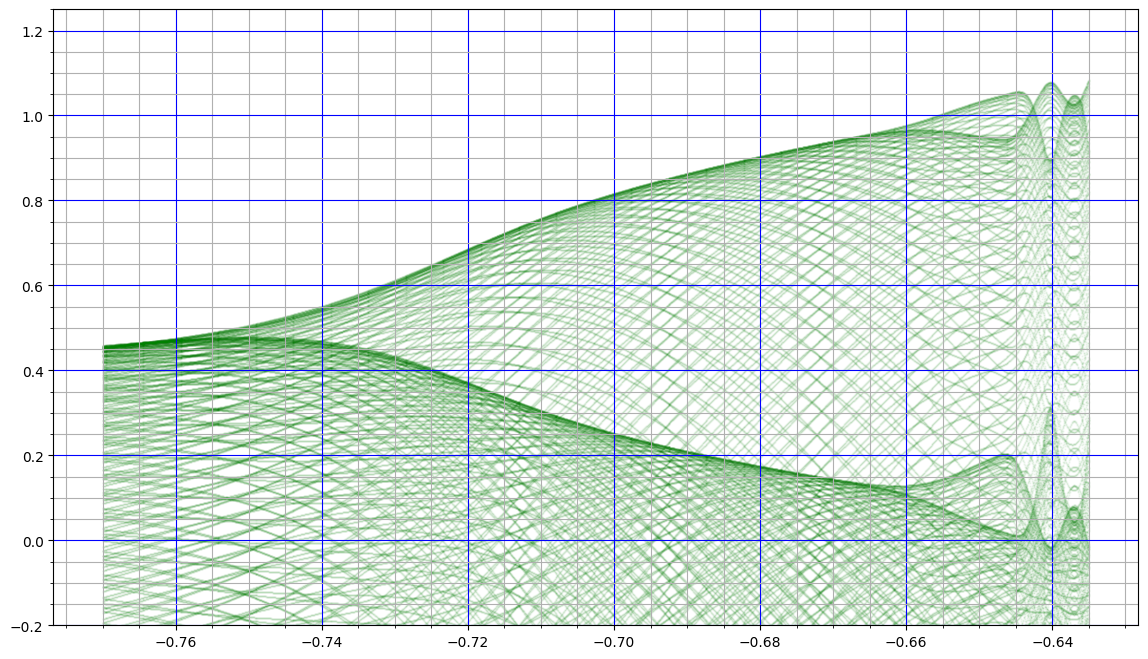

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

def circuit(y, t):
    dydt3 = A*y[2] - y[1] + np.abs(y[0]) - 1
    dydt2 = y[2]
    dydt1 = y[1]
    return np.array([dydt1, dydt2, dydt3])

# conditions
stepC = 2000
t_plot = np.linspace(0, 100, stepC)
# conditions, fetched from lab manual
y0 = np.array([0, 0, 0])
A_parameters = np.linspace(-0.77, -0.635, stepC)

circuit_plot = np.zeros([stepC, stepC, 3])
for i in range(stepC):
    A = A_parameters[i]
    circuit_plot[i] = odeint(circuit, y0, t_plot)
    #circuit_plot[i] = np.round(circuit_plot[i], decimals=2) # masking begins
    #circuit_plot[i] = np.abs(circuit_plot[i] + 1) - 1
    #unique_vals, unique_count = np.unique(circuit_plot[i], return_counts=True) # won't affect the plot, but will be used to calculate Feigenbaum
    #unique_vals = unique_vals[unique_count > np.argmax(unique_count) - 2]
    
# rather than writing this complicated code that will inevitably lack precision, I shall ingeniously measure the bifurcation points by hand
# (credit to Sebastian for suggesting manual measurement)


# plotting bifurcation diagram
fig1 = plt.figure(figsize=[14,8])
#ax1 = fig1.add_subplot(111)
for A_plots, x_plots in zip(A_parameters[:], circuit_plot[:,1500:,0]):
    plt.scatter([A_plots] * len(x_plots), x_plots, s=0.5, alpha=0.05, c='g')

plt.ylim([-0.2, 1.25])
plt.minorticks_on()
plt.grid(which='both')
plt.grid(which='major', c='b')
#LabelFont = {'family':'serif','color':'black','size':20}
#TitleFont = {'family':'serif','color':'black','size':25}
#ax1.set_xlabel("A", fontdict=LabelFont)
#ax1.set_ylabel("x, from t=75 to t=100", fontdict=LabelFont)
#ax1.set_title("x versus A", fontdict=TitleFont)

split_points = np.array([-0.760, -0.665, -0.645]) # points were hazy, so uncertainty = +/- 0.002
Feigenbaum = (split_points[1] - split_points[0]) / (split_points[2] - split_points[1])
print(f"Feigenbaum's constant is calculated at {Feigenbaum}, which is 4.8 +/- 0.5, accounting for uncertainty.")

Text(0.5, 1.0, 'dx/dt versus x, A = -0.642')

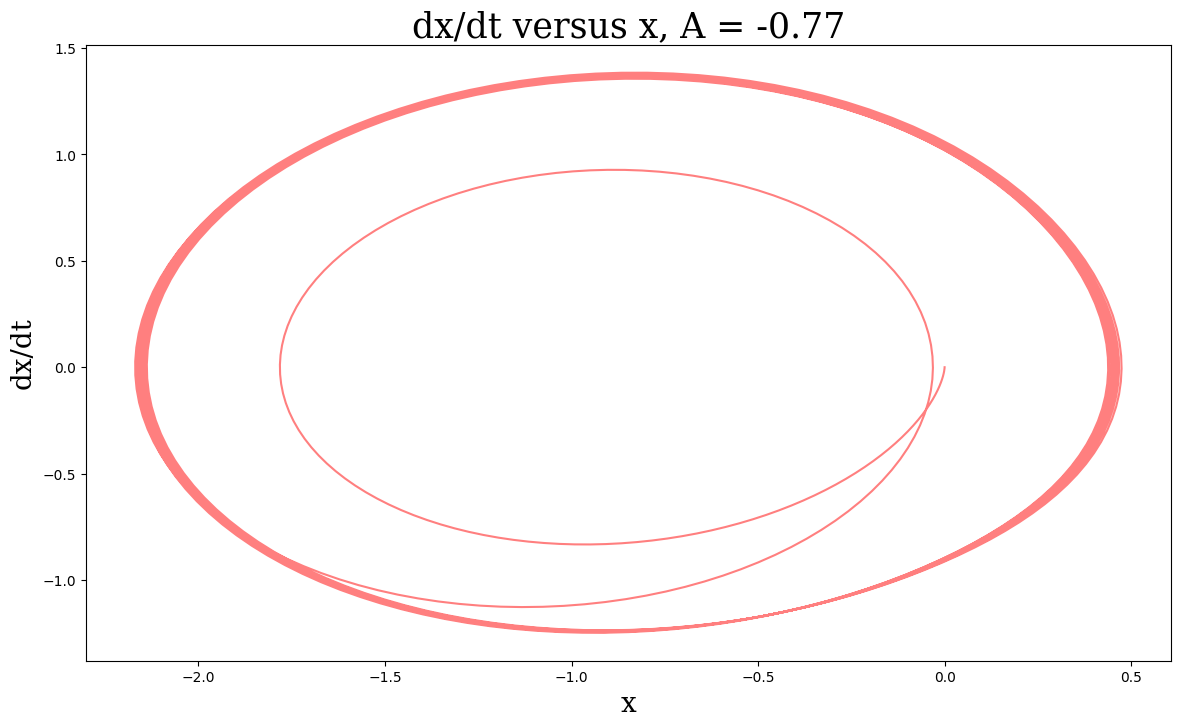

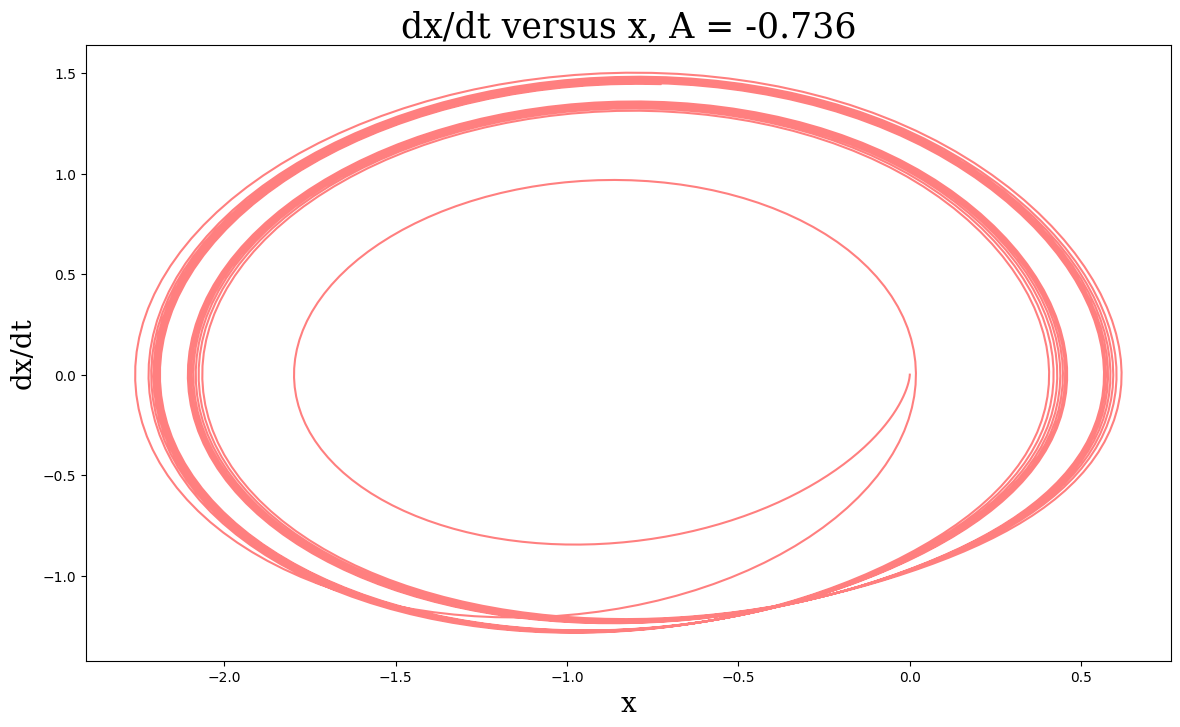

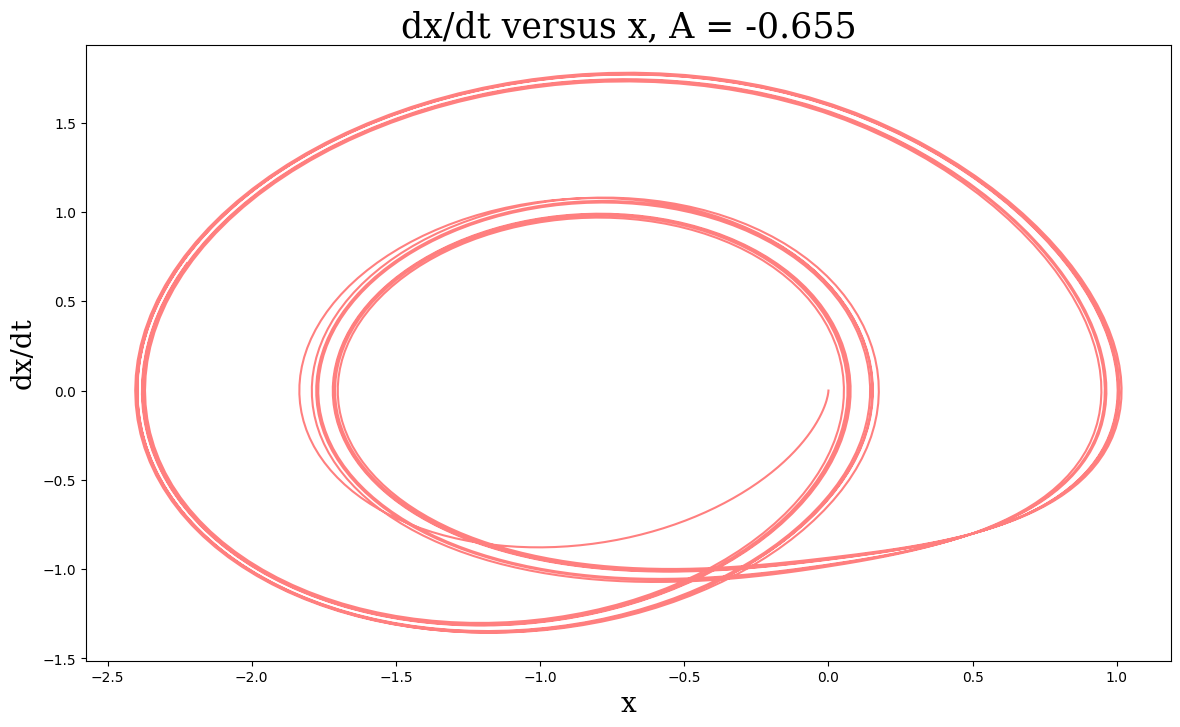

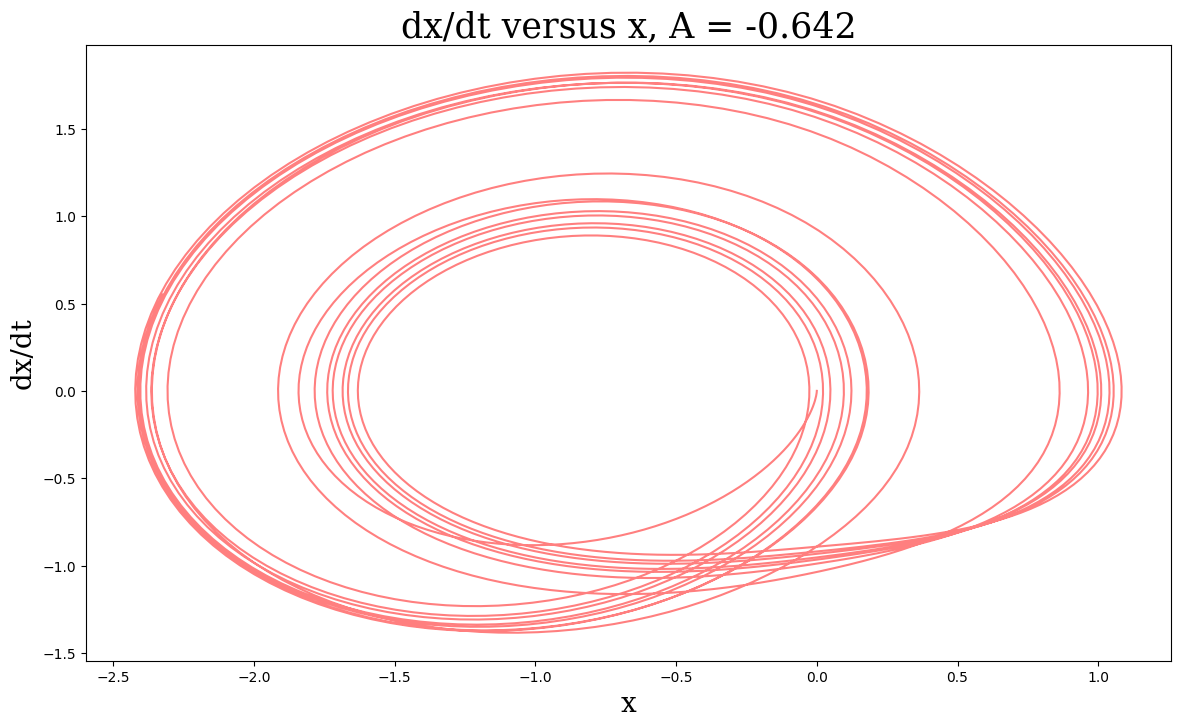

In [7]:
# phase space plots below
LabelFont = {'family':'serif','color':'black','size':20}
TitleFont = {'family':'serif','color':'black','size':25}

fig2 = plt.figure(figsize=[14,8])
ax2 = fig2.add_subplot(111)
plt.plot(circuit_plot[0,:,0], circuit_plot[0,:,1], c='r', alpha=0.5)
ax2.set_xlabel("x", fontdict=LabelFont)
ax2.set_ylabel("dx/dt", fontdict=LabelFont)
ax2.set_title(f"dx/dt versus x, A = {A_parameters[0]}", fontdict=TitleFont)

fig3 = plt.figure(figsize=[14,8])
ax3 = fig3.add_subplot(111)
plt.plot(circuit_plot[500,:,0], circuit_plot[500,:,1], c='r', alpha=0.5)
ax3.set_xlabel("x", fontdict=LabelFont)
ax3.set_ylabel("dx/dt", fontdict=LabelFont)
ax3.set_title(f"dx/dt versus x, A = {np.round(A_parameters[500], decimals=3)}", fontdict=TitleFont)

fig4 = plt.figure(figsize=[14,8])
ax4 = fig4.add_subplot(111)
plt.plot(circuit_plot[1700,:,0], circuit_plot[1700,:,1], c='r', alpha=0.5)
ax4.set_xlabel("x", fontdict=LabelFont)
ax4.set_ylabel("dx/dt", fontdict=LabelFont)
ax4.set_title(f"dx/dt versus x, A = {np.round(A_parameters[1700], decimals=3)}", fontdict=TitleFont)

fig5 = plt.figure(figsize=[14,8])
ax5 = fig5.add_subplot(111)
plt.plot(circuit_plot[1900,:,0], circuit_plot[1900,:,1], c='r', alpha=0.5)
ax5.set_xlabel("x", fontdict=LabelFont)
ax5.set_ylabel("dx/dt", fontdict=LabelFont)
ax5.set_title(f"dx/dt versus x, A = {np.round(A_parameters[1900], decimals=3)}", fontdict=TitleFont)

